In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_db3aab955d234e4090c6889e4becd5ab = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F5PYK6UZ84B9Q51VbRJr4NM1hsB3NOrLVytQbOMtdQ1J',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_db3aab955d234e4090c6889e4becd5ab.get_object(Bucket='milkgradingsystem-donotdelete-pr-qelzilii9u99my',Key='Milk Grading (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
# Milk Grading System

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


## Importing Libraries

In [2]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing dataset

In [3]:

data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


## Checking file size

In [4]:
data.shape

(1059, 8)

## Data Analysis & Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 66.3 KB


## Checking for null values

In [6]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Statistical summery

In [7]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.418319
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.393934
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,0.500000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.500000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


## Checking the datatypes of each column

In [8]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade         float64
dtype: object

In [9]:
data['Fat '].value_counts()

1    711
0    348
Name: Fat , dtype: int64

In [5]:
data['Grade'].value_counts()

0.0    429
0.5    374
1.0    256
Name: Grade, dtype: int64

In [6]:
data.loc[data['Grade']==0.0,'Grade'] = 'Bad'
data.loc[data['Grade']==0.5,'Grade']='Moderate'
data.loc[data['Grade']==1.0,'Grade']='Good'

In [12]:
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,Good
1,6.6,36,0,1,0,1,253,Good
2,8.5,70,1,1,1,1,246,Bad
3,9.5,34,1,1,0,1,255,Bad
4,6.6,37,0,0,0,0,255,Moderate
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,Moderate
1055,6.7,38,1,0,1,0,255,Good
1056,3.0,40,1,1,1,1,255,Bad
1057,6.8,43,1,0,1,0,250,Good


# data visualization

## Checking for correlation

In [7]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


## Heatmap

<AxesSubplot:>

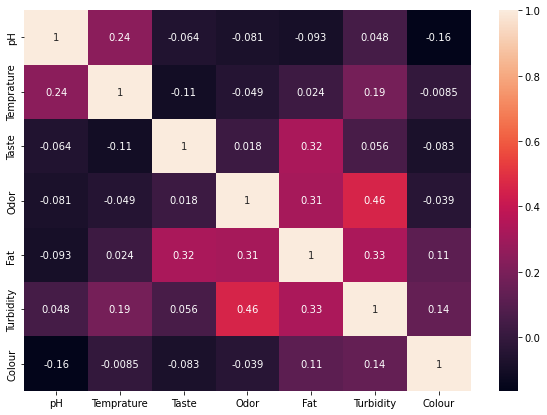

In [14]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True)

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Temprature'}>,
        <AxesSubplot:title={'center':'Taste'}>],
       [<AxesSubplot:title={'center':'Odor'}>,
        <AxesSubplot:title={'center':'Fat '}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Colour'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

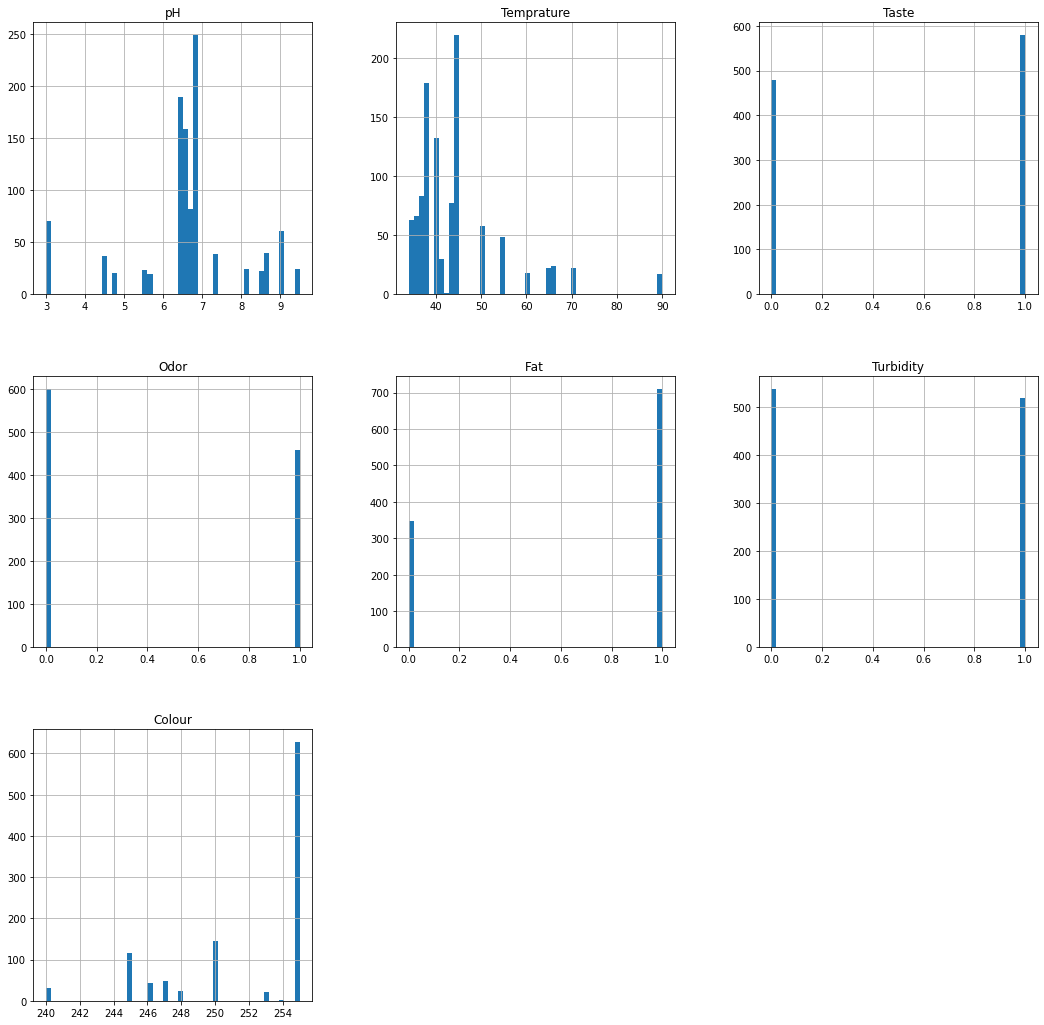

In [15]:
data.hist(bins=50, figsize=(18,18))

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


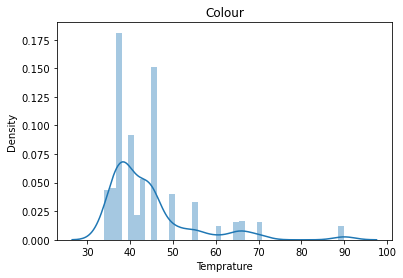

In [16]:
sns.distplot(data['Temprature'])
plt.title('Colour')
plt.show()

In [17]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

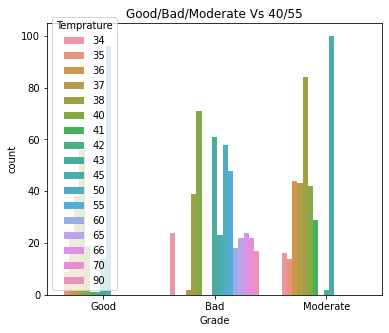

In [18]:
countplot_of_2('Grade','Temprature','Good/Bad/Moderate Vs 40/55')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Temprature', ylabel='Grade'>

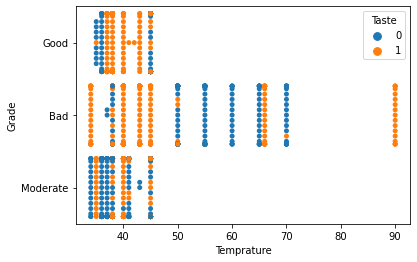

In [19]:
import seaborn as sns
sns.swarmplot(x="Temprature", y="Grade", hue="Taste", data=data)

## Pie diagram for Grade evaluation

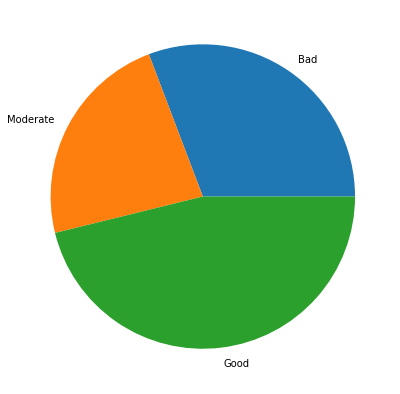

In [20]:
# Creating dataset
Grade = ['Bad', 'Moderate', 'Good']
 
cate = [20, 15, 30]
 
# Creating plot
fig = plt.figure(figsize =(11, 7))
plt.pie(cate, labels = Grade)
 
# show plot
plt.show()

## barplot for pH and Grade

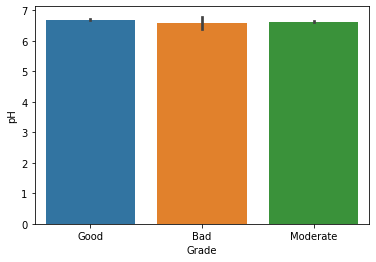

In [21]:
# create barplot Grade Vs pH
sns.barplot(x = 'Grade',
            y = 'pH',
            data = data)
 
# Show the plot
plt.show()

## boxplot for Colour and Grade

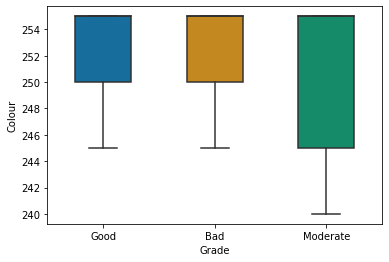

In [22]:
# create boxplot Colour Vs Grade
bplot = sns.boxplot(y='Colour', x='Grade', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

## scatterplot for Temprature and Grade

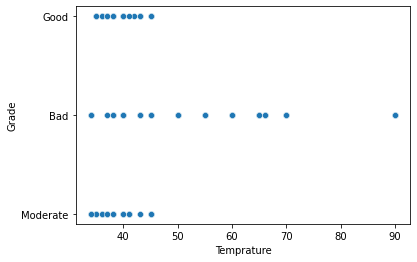

In [23]:
# create scatterplot Temprature Vs Grade

sns.scatterplot(data = data, x = "Temprature", y = "Grade")

plt.show()

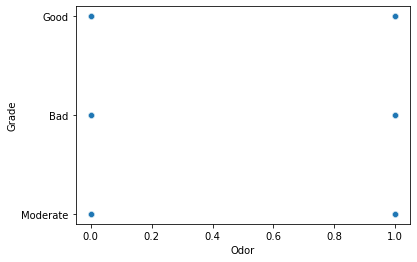

In [24]:
# create scatterplot Odor Vs Grade


sns.scatterplot(data = data, x = "Odor", y = "Grade")

plt.show()

## create pair plot

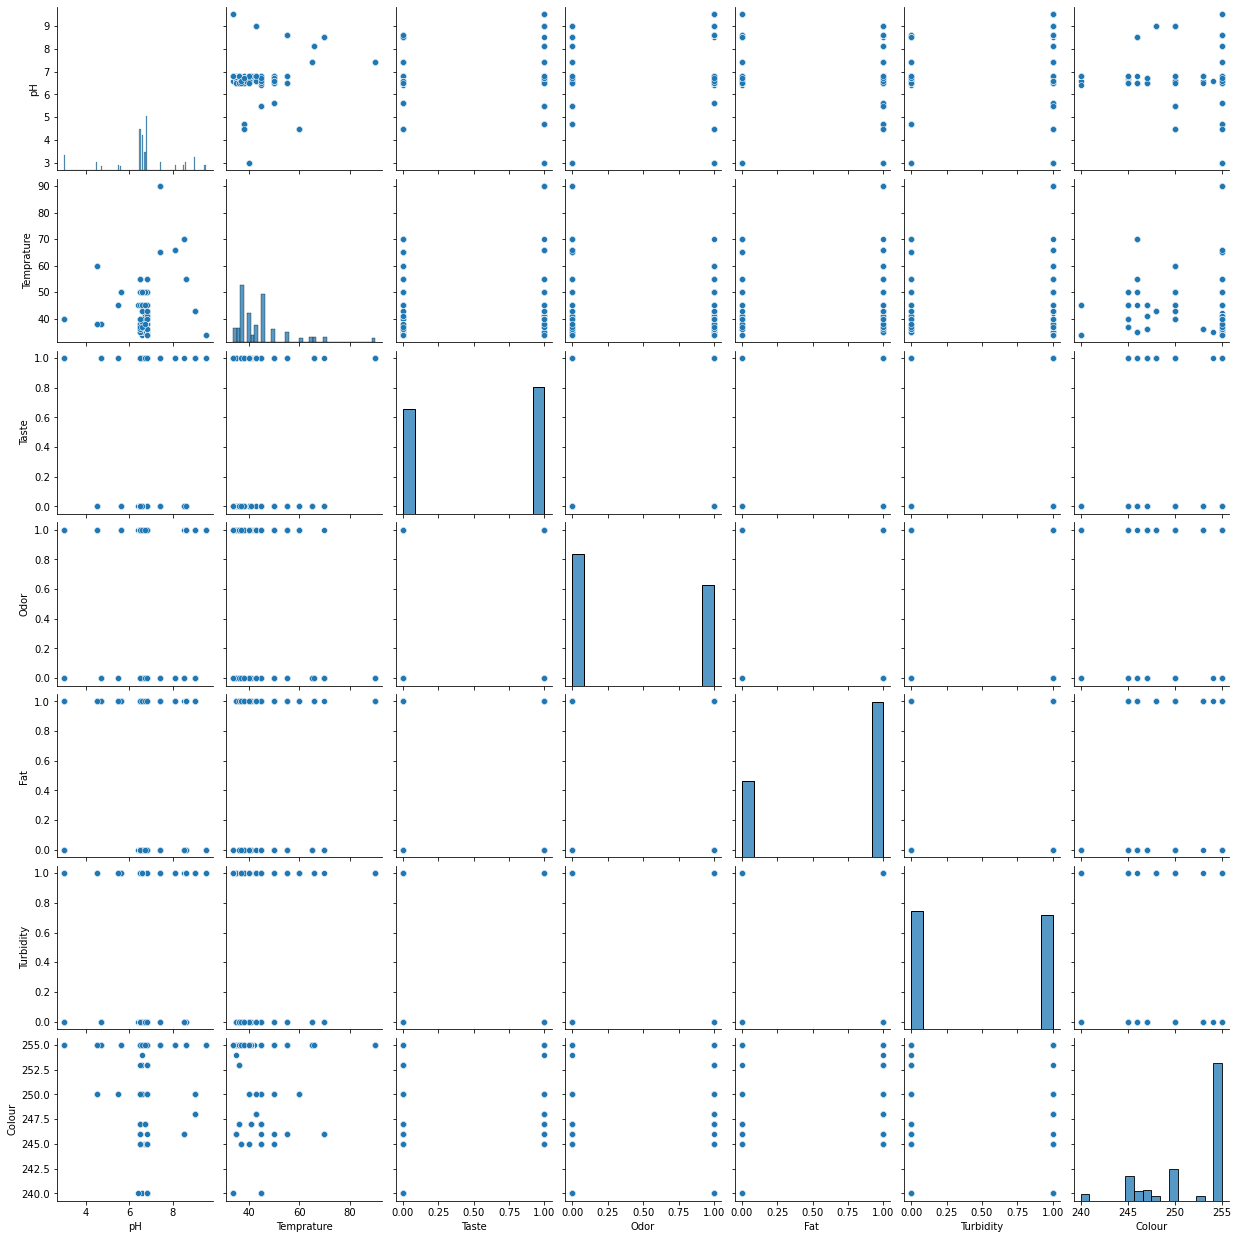

In [25]:
sns.pairplot(data)

## Detecting the Outliers

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

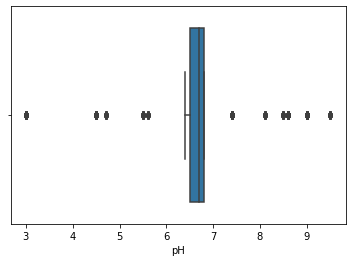

In [26]:
sns.boxplot(data['pH'])

In [8]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Grade']
x = data.drop(columns=['Grade'],axis=1)

## Train test split¶

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

## over sampling

In [10]:
!pip install -U imbalanced-learn

In [11]:
from imblearn import over_sampling

In [12]:
os = over_sampling.RandomOverSampler(random_state=0)

In [13]:
x,y = os.fit_resample(x,y)

In [14]:
y.value_counts()

Good        429
Bad         429
Moderate    429
Name: Grade, dtype: int64

In [15]:
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [16]:
y.tail()

1282    Moderate
1283    Moderate
1284    Moderate
1285    Moderate
1286    Moderate
Name: Grade, dtype: object

## model building

## 1. SupportVectorMachine Classifier

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict)
test_accuracy

0.5283018867924528

In [18]:
y_train_predict=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict)
train_accuracy

0.5560802833530106

In [19]:
pd.crosstab(y_test,y_predict)

col_0,Bad,Moderate
Grade,,
Bad,35,34
Good,0,66
Moderate,0,77


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         Bad       1.00      0.51      0.67        69
        Good       0.00      0.00      0.00        66
    Moderate       0.44      1.00      0.61        77

    accuracy                           0.53       212
   macro avg       0.48      0.50      0.43       212
weighted avg       0.48      0.53      0.44       212



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Random Forest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict1)
test_accuracy



0.9905660377358491

In [22]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy


1.0

In [23]:
pd.crosstab(y_test,y_predict1)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [24]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



## 3. Decision tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict2)
test_accuracy


0.9905660377358491

In [26]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy


1.0

In [27]:
pd.crosstab(y_test,y_predict2)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [28]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



## 4. ExtraTrees Classifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict3)
test_accuracy



0.9905660377358491

In [30]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy


1.0

In [31]:
pd.crosstab(y_test,y_predict3)

col_0,Bad,Good,Moderate
Grade,,,
Bad,68,0,1
Good,0,65,1
Moderate,0,0,77


In [32]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99        69
        Good       1.00      0.98      0.99        66
    Moderate       0.97      1.00      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [33]:
results= [['SVC',test_accuracy],['RandomForestClassifier',test_accuracy],
              ['DecisionTreeClassifier',test_accuracy], ['ExtraTreesClassifier',test_accuracy],
          ]

Liverpatient_predi= pd.DataFrame(results, columns = ['classification models', 'accuracy_score'])
Liverpatient_predi

,classification models,accuracy_score
0,SVC,0.990566
1,RandomForestClassifier,0.990566
2,DecisionTreeClassifier,0.990566
3,ExtraTreesClassifier,0.990566


<AxesSubplot:title={'center':'Classification models & accuracy scores'}, xlabel='classification models', ylabel='accuracy_score'>

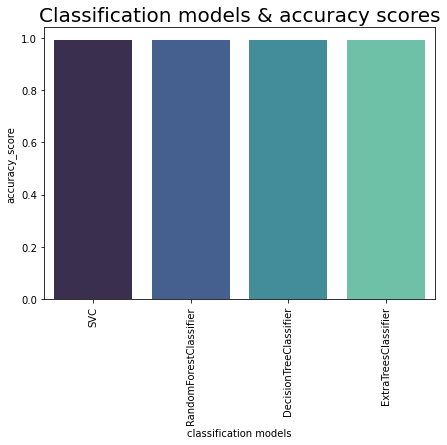

In [53]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores',fontsize=20)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")

## Hyper parameter tuning using GridSearchCV

### Hyper parameter tuning using GridSearchCV for SVC



In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters = {
              "kernel":['linear', 'rbf', 'sigmoid'],"gamma":['scale', 'auto'],
              "break_ties":['bool', 'default=False']   
              }


In [36]:
from sklearn.model_selection import KFold
svc=SVC()
gdcv = GridSearchCV(estimator=svc,param_grid=parameters)

In [37]:
gdcv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'break_ties': ['bool', 'default=False'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [38]:
from sklearn.metrics import accuracy_score
svc=SVC(kernel='linear',gamma='scale',break_ties='bool')
svc.fit(x_train,y_train)
y_train_pred=svc.predict(x_train)
y_test_pred=svc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 0.885478158205431
test accuracy 0.8443396226415094


### Hyper parameter tuning using GridSearchCV for RFC

In [39]:
parameters={"n_estimators" : [2,5,10,15,20,25],
            "warm_start":['False'],"min_samples_split":[2],"criterion":['entropy'], "random_state":[111]
    }
        

In [40]:
rfc=RandomForestClassifier()
gdcv1 = GridSearchCV(estimator=rfc,param_grid=parameters)

In [41]:
gdcv1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_split': [2],
                         'n_estimators': [2, 5, 10, 15, 20, 25],
                         'random_state': [111], 'warm_start': ['False']})

In [42]:
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=2,warm_start='False',
                           random_state=111)
rfc.fit(x_train,y_train)
y_train_pred=rfc.predict(x_train)
y_test_pred=rfc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 0.9988193624557261
test accuracy 0.9905660377358491


### Hyper parameter tuning using GridSearchCV for ETC

In [43]:
parameters={"n_estimators":[2,5,10,15,20,25],"criterion":['entropy'],
            "min_samples_split":[2],
             "min_samples_leaf":[1],"random_state":[111]}

In [44]:
etc=ExtraTreesClassifier()
gdcv2 = GridSearchCV(estimator=etc,param_grid=parameters)

In [45]:
gdcv2.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [2, 5, 10, 15, 20, 25],
                         'random_state': [111]})

In [46]:
from sklearn.metrics import accuracy_score
etc=ExtraTreesClassifier(min_samples_leaf=1,min_samples_split=2,n_estimators=2,criterion='entropy',
                         random_state=111)
etc.fit(x_train,y_train)
y_train_pred=etc.predict(x_train)
y_test_pred=etc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 1.0
test accuracy 0.9905660377358491


### Hyper parameter tuning using GridSearchCV for DTC

In [47]:
parameters={"criterion":['entropy'],
    "splitter":['best'],
    "min_samples_split":[2],"random_state":[111]}

In [48]:
dtc=DecisionTreeClassifier()
gdcv3 = GridSearchCV(estimator=dtc,param_grid=parameters)

In [49]:
gdcv3.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_split': [2],
                         'random_state': [111], 'splitter': ['best']})

In [50]:
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=2,criterion='entropy',random_state=111)
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_test_pred=dtc.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred,y_train))
print("test accuracy",accuracy_score(y_test_pred,y_test))

train accuracy 1.0
test accuracy 0.9905660377358491


In [51]:
import pickle
pickle.dump(rfc,open('milk.pkl','wb'))

In [52]:
pwd

'/home/wsuser/work'

In [53]:
 !tar -zcvf milk-grading-model_new.tgz milk.pkl

milk.pkl


In [54]:
ls-1

milk-grading-model_new.tgz
milk.pkl


In [61]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "_uQJaQRra2V-2lHNbQY1-q314HMfQ3Rkw1ZhkFeVDtWN"
}
client = APIClient(wml_credentials)

In [62]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [63]:
space_uid = guid_from_space_name(client, space_name='Milk Grading System')
print("Space UID = " + space_uid)

Space UID = 984825ad-3c95-454d-8f72-69950b759cbb


In [64]:
client.set.default_space(space_uid)

'SUCCESS'

In [65]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [66]:
import sklearn
sklearn.__version__

'1.1.1'

In [67]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [75]:
model_details = client.repository.store_model(model='milk-grading-model_new.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"milk-grading",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=x_train,
                                              training_target=y_train)

In [76]:
model_id = client.repository.get_model_id(model_details)
model_id

'9d7fd654-9b80-4e74-be5e-27a1fb116e31'

In [77]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"Milk Grading System_deploy", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: '9d7fd654-9b80-4e74-be5e-27a1fb116e31' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f7293f6f-67be-4c43-9eb5-917a520bac11'
------------------------------------------------------------------------------------------------




In [78]:
x_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
505,6.6,38,0,0,0,0,255
928,6.6,45,0,0,0,1,250
650,6.8,45,0,1,0,0,240
626,6.5,40,1,0,0,0,250
443,6.8,45,1,1,1,1,245
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


In [79]:
y_train

505     Moderate
928     Moderate
650     Moderate
626     Moderate
443         Good
          ...   
1033    Moderate
763          Bad
835          Bad
559          Bad
684     Moderate
Name: Grade, Length: 847, dtype: object

In [80]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-06-07T10:44:31.622Z',
  'id': '9d7fd654-9b80-4e74-be5e-27a1fb116e31',
  'modified_at': '2022-06-07T10:44:33.618Z',
  'name': 'milk-grading',
  'owner': 'IBMid-672000RZJT',
  'resource_key': '8f69e650-7b0b-4964-b5b2-5feedaa76a36',
  'space_id': '984825ad-3c95-454d-8f72-69950b759cbb'},
 'system': {'warnings': []}}